In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model

### 讀入資料庫

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

### 平常CNN辨識RGB三個channel但我們現在只有黑白一個Channel, 所以(28,28) 改成 (28,28,1)

In [5]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要的函式

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

### Step1打造函數學習機(CNN)

In [15]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding="same", input_shape=(28,28,1), activation="relu")) #16個filter 輸出16個28x28矩陣(但全部重疊)  output(28,28,16)
model.add(MaxPooling2D(pool_size=(2,2))) #切開來變成output(14,14,16)
model.add(Conv2D(32, (3,3), padding="same", activation="relu")) #output(14,14,32)
model.add(MaxPooling2D(pool_size=(2,2))) #output(7,7,32)
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #output(7,7,32)
model.add(Flatten())
model.add(Dense(54, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [16]:
model.summary()

#第一層  [3*3(權重)+1(bias)] * 16 = 160 
#第二層  [16*3*3(權重)+1(bias)] * 32 = 4640
#第三層 [32*3*3(權重)+1(bias)]* 64 = 18496


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)              

In [18]:
model.compile(loss="mse", optimizer=SGD(lr=0.087), metrics=["accuracy"]) #loss可以試試看不一樣的

### Step 2. Fit

In [19]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 33s 557us/sample - loss: 0.0898 - acc: 0.1248
Epoch 2/12
60000/60000 [==============================] - 31s 516us/sample - loss: 0.0888 - acc: 0.2835
Epoch 3/12
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0856 - acc: 0.4709
Epoch 4/12
60000/60000 [==============================] - 32s 536us/sample - loss: 0.0542 - acc: 0.6503
Epoch 5/12
60000/60000 [==============================] - 44s 728us/sample - loss: 0.0212 - acc: 0.8697
Epoch 6/12
60000/60000 [==============================] - 44s 736us/sample - loss: 0.0136 - acc: 0.9141
Epoch 7/12
60000/60000 [==============================] - 34s 572us/sample - loss: 0.0107 - acc: 0.9328
Epoch 8/12
60000/60000 [==============================] - 40s 667us/sample - loss: 0.0091 - acc: 0.9420
Epoch 9/12
60000/60000 [==============================] - 32s 526us/sample - loss: 0.0080 - acc: 0.9491
Epoch 10/12
60000/60000 [==============================] - 37s 6

### Step 3. 預測

In [22]:
result = model.predict_classes(x_test)

In [30]:
def predict(n):
    print('CNN預測是:', result[n])
    x = x_test[n].reshape(28,28)
    plt.imshow(x, cmap="Greys")

CNN預測是: 9


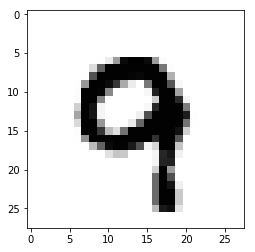

In [31]:
predict(99)

In [32]:
from ipywidgets import interact_manual

interact_manual(predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.predict(n)>

### 保存訓練模型

In [ ]:
save_model("myCNNmodel.h5")